In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import plotly.graph_objects as go
import scipy
import sklearn

In [ ]:
x, mean1, std1, prior1, mean2, std2, prior2 = sp.symbols('x mean1 std1 prior1 mean2 std2 prior2')

# Define the likelihood function
def normal_likelihood(x, mean, std, prior):
    return (1/((2*sp.pi)**(1/2) * std)) * sp.exp((-1/2)*((x-mean)/std)**2) * prior

# Define the posterior probability function
def normal_posterior_probability(x, mean1, std1, prior1, mean2, std2, prior2):
    likelihood1 = normal_likelihood(x, mean1, std1, prior1)
    likelihood2 = normal_likelihood(x, mean2, std2, prior2)
    return likelihood1 / (likelihood1 + likelihood2)

# Define the classifier
def normal_classifier(x, mean1, std1, prior1, mean2, std2, prior2):
    px = normal_likelihood(x, mean1, std1, prior1) + normal_likelihood(x, mean2, std2, prior2)
    return -((x - mean1) ** 2 ) / (2*(std1**2)) - (sp.log(2*sp.pi)/2) - sp.log(std1) + sp.log(prior1) - sp.log(px)

# Vectorize the functions if needed
normal_l = np.vectorize(normal_likelihood)
normal_pp = np.vectorize(normal_posterior_probability)
normal_c = np.vectorize(normal_classifier)

In [ ]:
# Generate x values for plotting
x_values = np.linspace(-8,8)  # Adjust the range as needed

mean_1, std_1, prior_1  = -1, 0.5, 0.5
mean_2, std_2, prior_2 = 1, 0.5, 0.5

# Plot the graph
#plt.figure(figsize=(10, 6))
plt.ylim(0,1)
#plt.plot(x_values, y_values, label='likelyhood', color='blue')
plt.plot(x_values, normal_l(x_values, mean_1, std_1, prior_1), color = "yellow")
plt.plot(x_values, normal_l(x_values, mean_2, std_2, prior_2))
plt.show()
plt.plot(x_values, normal_pp(x_values, mean_1, std_1, prior_1, mean_2, std_2, prior_2), label='post', color='red')
plt.plot(x_values, normal_pp(x_values, mean_2, std_2, prior_2, mean_1, std_1, prior_1), label='post2', color='green')
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result)
    print(result)
plt.show()

std1: 0.40587 std2: 0.64192
mean1: -1.13095 mean2: 0.94924


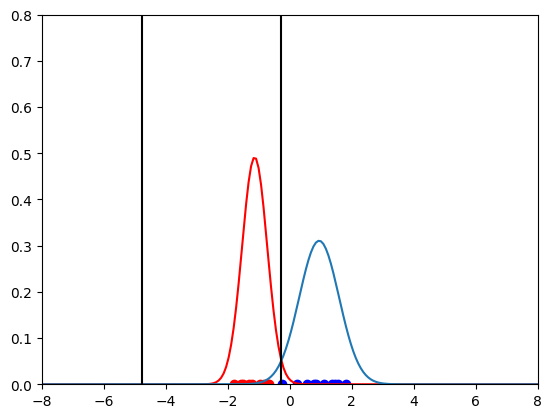

-4.76428962506235
-0.268492029032329


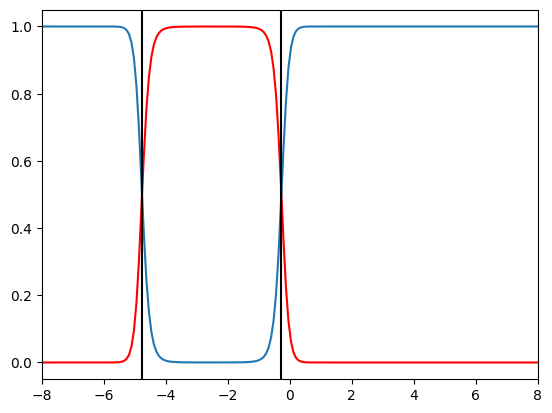

In [510]:
x_values = np.linspace(-8, 8,200)

np.random.seed(4)
data1 = np.random.normal(-1, 0.5, 10)
np.random.seed(6)
data2 = np.random.normal(1, 0.5, 10)

mean_1, std_1, prior_1 = np.mean(data1), np.std(data1, ddof=1), 0.5
mean_2, std_2, prior_2 = np.mean(data2), np.std(data2, ddof=1), 0.5

print("std1: {:.5f}".format(std_1), "std2: {:.5f}".format(std_2))
print("mean1: {:.5f}".format(mean_1), "mean2: {:.5f}".format(mean_2))

# Plot the graph
#plt.figure(figsize=(10, 6))
plt.ylim(0,0.8)
#plt.plot(x_values, y_values, label='likelyhood', color='blue')
plt.plot(x_values, normal_l(x_values, mean_1, std_1, prior_1), color = "red",label="Class 1")
plt.plot(x_values, normal_l(x_values, mean_2, std_2, prior_2),label="Class 2")
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result,color="black")
plt.xlim(-8, 8)
plt.scatter(data1, [0]*len(data1), color = "red")
plt.scatter(data2, [0]*len(data1), color = "blue")
plt.show()

plt.plot(x_values, normal_pp(x_values, mean_1, std_1, prior_1, mean_2, std_2, prior_2), label='post', color='red')
plt.plot(x_values, normal_pp(x_values, mean_2, std_2, prior_2, mean_1, std_1, prior_1), label='post2')
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result,color="black")
    print(result)
plt.xlim(-8, 8)
plt.show()

In [ ]:
# Generate x values for plotting
x_values = np.linspace(-8,8)  # Adjust the range as needed

mean_1, std_1, prior_1  = -1, 0.4, 0.5
mean_2, std_2, prior_2 = 1, 0.6, 0.5

# Plot the graph
#plt.figure(figsize=(10, 6))
plt.ylim(0,1)
#plt.plot(x_values, y_values, label='likelyhood', color='blue')
plt.plot(x_values, normal_l(x_values, mean_1, std_1, prior_1), color = "yellow")
plt.plot(x_values, normal_l(x_values, mean_2, std_2, prior_2))
plt.show()
plt.plot(x_values, normal_pp(x_values, mean_1, std_1, prior_1, mean_2, std_2, prior_2), label='post', color='red')
plt.plot(x_values, normal_pp(x_values, mean_2, std_2, prior_2, mean_1, std_1, prior_1), label='post2', color='green')
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result)
plt.show()

std1: 0.32469 std2: 0.77031
mean1: -1.10476 mean2: 0.93909


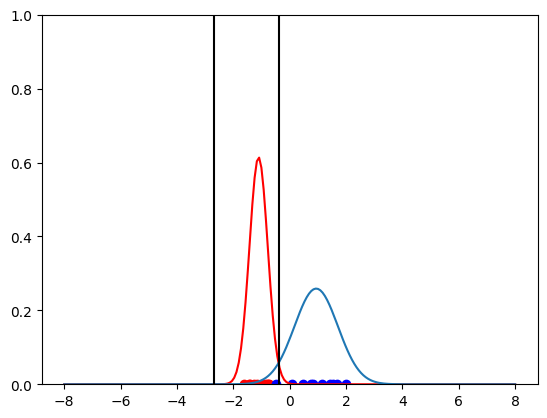

-2.69487279572038
-0.397846077133263


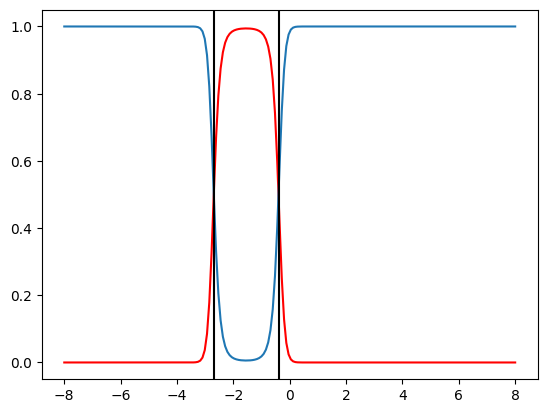

In [514]:
x_values = np.linspace(-8, 8,200)

np.random.seed(4)
data1 = np.random.normal(-1, 0.4, 10)
np.random.seed(6)
data2 = np.random.normal(1, 0.6, 10)

mean_1, std_1, prior_1 = np.mean(data1), np.std(data1, ddof=1), 0.5
mean_2, std_2, prior_2 = np.mean(data2), np.std(data2, ddof=1), 0.5

print("std1: {:.5f}".format(std_1), "std2: {:.5f}".format(std_2))
print("mean1: {:.5f}".format(mean_1), "mean2: {:.5f}".format(mean_2))

# Plot the graph
#plt.figure(figsize=(10, 6))
plt.ylim(0,1)
#plt.plot(x_values, y_values, label='likelyhood', color='blue')
plt.plot(x_values, normal_l(x_values, mean_1, std_1, prior_1), color = "red")
plt.plot(x_values, normal_l(x_values, mean_2, std_2, prior_2))
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result,color="black")
    
plt.scatter(data1, [0]*len(data1), color = "red")
plt.scatter(data2, [0]*len(data1), color = "blue")
plt.show()

plt.plot(x_values, normal_pp(x_values, mean_1, std_1, prior_1, mean_2, std_2, prior_2), label='post', color='red')
plt.plot(x_values, normal_pp(x_values, mean_2, std_2, prior_2, mean_1, std_1, prior_1), label='post2')
for result in sp.solve(sp.Eq(normal_classifier(x, mean_1, std_1, prior_1, mean_2, std_2, prior_2) - normal_classifier(x, mean_2, std_2, prior_2, mean_1, std_1, prior_1), 0), x):
    plt.axvline(x = result,color="black")
    print(result)
plt.show()

In [ ]:
x1, x2, mean1, covariance1, prior1, mean2, covariance2, prior2 = sp.symbols('x1 x2 mean1 covariance1 prior1 mean2 covariance2 prior2')

def multi_attr_likelyhood(x1, x2, mean, covariance, prior):
    x = np.array([x1, x2])
    front = (1/((2 * np.pi) ** (covariance.shape[0]/2) * np.linalg.det(covariance) ** (1/2)))
    back = np.exp(-(1/2)*np.dot(np.dot(np.transpose(x - mean), np.linalg.inv(covariance)), (x - mean)))
    return front * back * prior

def multi_attr_posterier_prob(x1, x2, mean1, covariance1, prior1, mean2, covariance2, prior2):
    likelihood1 = multi_attr_likelyhood(x1, x2, mean1, covariance1, prior1)
    likelihood2 = multi_attr_likelyhood(x1, x2, mean2, covariance2, prior2)
    return likelihood1 / (likelihood1 + likelihood2)

def multi_attr_likelyhood_sym(x1, x2, mean1, covariance1, prior1):
    x = sp.Matrix([x1, x2])
    front = (1/((2 * sp.pi) ** (covariance1.shape[0]/2) * (covariance1.det()) ** (1/2)))
    back = sp.exp(-1/2) * (x - mean1).T * covariance1 ** (-1) * (x - mean1)
    return front * back * prior1

def multi_attr_classifier(x1, x2, mean1, covariance1, prior1, mean2, covariance2, prior2):
    x = sp.Matrix([x1, x2])
    px = multi_attr_likelyhood_sym(x1, x2, mean1, covariance1, prior1) + multi_attr_likelyhood_sym(x1, x2, mean2, covariance2, prior2)
    return (-(1/2) * (x - mean1).T * covariance1 ** (-1) * (x - mean1))[0] - (covariance1.shape[0]/2) * sp.log(2 * sp.pi) - (1/2) * sp.log(covariance1.det()) + sp.log(prior1) - sp.log(px[0])

# Random data Quadratic Discriminant

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)
n=10
np.random.seed(4)
data1_a1 = np.random.normal(2, 0.5, n)
np.random.seed(5)
data1_a2 = np.random.normal(0, 0.25, n)
np.random.seed(6)
data2_a1 = np.random.normal(1, 0.25, n)
np.random.seed(7)
data2_a2 = np.random.normal(0, 0.5, n)

covar1 = np.cov(np.array([data1_a1, data1_a2]))[0,1]
covar2 = np.cov(np.array([data2_a1, data2_a2]))[0,1]

mean1_list, var1_list = [np.mean(data1_a1), np.mean(data1_a2)], [[np.var(data1_a1, ddof=1), covar1], [covar1, np.var(data1_a2, ddof=1)]]
mean2_list, var2_list = [np.mean(data2_a1), np.mean(data2_a2)], [[np.var(data2_a1, ddof=1), covar2], [covar2, np.var(data2_a2, ddof=1)]]

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), 0.5
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), 0.5

print("mean1\n",mean_1,"\nvar1\n",var_1)
print("mean2\n",mean_2,"\nvar2\n",var_2)
# print("std1: {:.5f}".format(std_1), "std2: {:.5f}".format(std_2))
# print("mean1: {:.5f}".format(mean_1), "mean2: {:.5f}".format(mean_2))

# Z1 = np.zeros(X1.shape)
# for i in range(X1.shape[0]):
#     for j in range(X2.shape[1]):
#       Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

# Z2 = np.zeros(X1.shape)
# for i in range(X1.shape[0]):
#     for j in range(X2.shape[1]):
#       Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

# plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
# plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Likelihoods')

# plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, colorscale='reds',opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, colorscale='blues',opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='reds'))

fig.add_trace(go.Surface(x=x1_values, y=x2_values, z=Z2, colorscale='blues'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
    scene = dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Posterior'),
)

fig.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-4,4,100)  # Adjust the range as needed
x2_values = np.linspace(-4,4,100)

X1, X2 = np.meshgrid(x1_values, x2_values, indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods and Decision Boundaries')

mean_1, var_1, prior_1  = sp.Matrix(mean1_list), sp.Matrix(var1_list), 0.5
mean_2, var_2, prior_2  = sp.Matrix(mean2_list), sp.Matrix(var2_list), 0.5

for sol in sp.solve(sp.Eq(multi_attr_classifier(x1, x2, mean_1, var_1, prior_1, mean_2, var_2, prior_2), 
                     multi_attr_classifier(x1, x2, mean_2, var_2, prior_2, mean_1, var_1, prior_1)), x1,  dict = True) :
    func = sp.lambdify((x2), sol[x1], 'numpy')
    vec_func = np.vectorize(func)
    plt.plot(vec_func(x2_values), x2_values,color = "black")

plt.scatter(data1_a1, data1_a2, color="red", s =1,alpha=0.5)
plt.scatter(data2_a1, data2_a2, color="blue", s =1,alpha=0.5)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.show()

# Quadratic discriminant

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

mean1_list, var1_list = [2,0], [[0.5,0], [0,0.25]]
mean2_list, var2_list = [1,0], [[0.25,0], [0,0.5]]

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), 0.5
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), 0.5

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods')

plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, colorscale='reds',line_width=2,opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, colorscale='blues',line_width=2,opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Surface(x=x1_values, y=x2_values, z=Z2, colorscale='reds'))

fig.add_trace(go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='blues'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values, indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods and Decision Boundaries')

mean_1, var_1, prior_1  = sp.Matrix(mean1_list), sp.Matrix(var1_list), 0.5
mean_2, var_2, prior_2  = sp.Matrix(mean2_list), sp.Matrix(var2_list), 0.5

for sol in sp.solve(sp.Eq(multi_attr_classifier(x1, x2, mean_1, var_1, prior_1, mean_2, var_2, prior_2), 
                     multi_attr_classifier(x1, x2, mean_2, var_2, prior_2, mean_1, var_1, prior_1)), x1,  dict = True) :
    func = sp.lambdify((x2), sol[x1], 'numpy')
    vec_func = np.vectorize(func)
    plt.plot(vec_func(x2_values), x2_values, color="black")

plt.xlim(-8, 8)
plt.grid(True)
plt.show()

# Random data Linear Discriminant

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)
n=10
np.random.seed(4)
data1_a1 = np.random.normal(-1, 1, n)
np.random.seed(5)
data1_a2 = np.random.normal(-1, 1, n)
np.random.seed(6)
data2_a1 = np.random.normal(1, 1, n)
np.random.seed(7)
data2_a2 = np.random.normal(1, 1, n)

covar1 = np.cov(np.array([data1_a1, data1_a2]))[0,1]
covar2 = np.cov(np.array([data2_a1, data2_a2]))[0,1]

mean1_list, var1_list = [np.mean(data1_a1), np.mean(data1_a2)], [[np.var(data1_a1, ddof=1), covar1], [covar1, np.var(data1_a2, ddof=1)]]
mean2_list, var2_list = [np.mean(data2_a1), np.mean(data2_a2)], [[np.var(data2_a1, ddof=1), covar2], [covar2, np.var(data2_a2, ddof=1)]]

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), 0.5
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), 0.5

print("mean1\n",mean_1,"\nvar1\n",var_1)
print("mean2\n",mean_2,"\nvar2\n",var_2)

# Z1 = np.zeros(X1.shape)
# for i in range(X1.shape[0]):
#     for j in range(X2.shape[1]):
#       Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

# Z2 = np.zeros(X1.shape)
# for i in range(X1.shape[0]):
#     for j in range(X2.shape[1]):
#       Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

# plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
# plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Likelihoods')

# plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values,indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, colorscale='reds',opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, colorscale='blues',opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='reds'))

fig.add_trace(go.Surface(x=x1_values, y=x2_values, z=Z2, colorscale='blues'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
    scene = dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Posterior'),
)

fig.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values, indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods and Decision Boundaries')

mean_1, var_1, prior_1  = sp.Matrix(mean1_list), sp.Matrix(var1_list), 0.5
mean_2, var_2, prior_2  = sp.Matrix(mean2_list), sp.Matrix(var2_list), 0.5

for sol in sp.solve(sp.Eq(multi_attr_classifier(x1, x2, mean_1, var_1, prior_1, mean_2, var_2, prior_2), 
                     multi_attr_classifier(x1, x2, mean_2, var_2, prior_2, mean_1, var_1, prior_1)), x1,  dict = True) :
    func = sp.lambdify((x2), sol[x1], 'numpy')
    vec_func = np.vectorize(func)
    plt.plot(vec_func(x2_values), x2_values,color = "black")

plt.scatter(data1_a1, data1_a2, color="red", s =1,alpha=0.5)
plt.scatter(data2_a1, data2_a2, color="blue", s =1,alpha=0.5)

plt.xlim(-8, 8)
plt.grid(True)
plt.show()

# Linear Discriminant

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

mean1_list, var1_list = [-1,-1], [[1, 0], [0, 1]]
mean2_list, var2_list = [1,1], [[1, 0], [0, 1]]

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), 0.5
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), 0.5

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)



plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods')

plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, contours_coloring='lines', colorscale='tealrose',line_width=2))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, contours_coloring='lines', colorscale='tealrose',line_width=2))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data=go.Surface(x=x1_values, y=x2_values, z=Z2, colorscale='tealrose'))

fig.add_trace(go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='RdBu'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values, indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods and Decision Boundaries')

mean_1, var_1, prior_1  = sp.Matrix(mean1_list), sp.Matrix(var1_list), 0.5
mean_2, var_2, prior_2  = sp.Matrix(mean2_list), sp.Matrix(var2_list), 0.5

for sol in sp.solve(sp.Eq(multi_attr_classifier(x1, x2, mean_1, var_1, prior_1, mean_2, var_2, prior_2), 
                     multi_attr_classifier(x1, x2, mean_2, var_2, prior_2, mean_1, var_1, prior_1)), x1,  dict = True) :
    func = sp.lambdify((x2), sol[x1], 'numpy')
    vec_func = np.vectorize(func)
    plt.plot(vec_func(x2_values), x2_values, color = "green")

# plt.xlim(-4, 4)
# plt.ylim(-4, 4)
plt.grid(True)
plt.show()

# ข้อ5

## Data

In [ ]:
from sklearn.datasets import make_circles, make_classification, make_moons
from matplotlib.colors import ListedColormap

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

dataset1 = make_moons(noise=0.3, random_state=0)
dataset2 = make_circles(noise=0.2, factor=0.5, random_state=1)
dataset3 = linearly_separable

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

plt.scatter(dataset3[0][:,0], dataset3[0][:,1], c=dataset3[1], cmap = cm_bright)
plt.plot()

## Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objs as go
# Manually define your training data
X = dataset1[0]
y = dataset1[1]  # Binary class labels (0 or 1)

# Define a function to add polynomial features with a specified degree
def add_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    # Select the columns for X, Y, and XY if they exist
    #if degree >= 2:
        #X_poly = X_poly[:, [1, 2, 4]]
    #else:
        #X_poly = X_poly[:, [1, 2]]
    
    # Add a column of ones to the most left column
    ones_column = np.ones((X_poly.shape[0], 1))
    X_poly_selected = np.concatenate((ones_column, X_poly), axis=1)
    
    return X_poly_selected


# Specify the polynomial degree
degree = 1  # You can change the degree as needed

# Add polynomial features
X_poly_selected = add_polynomial_features(X, degree)
# Calculate the number of features generated by the polynomial transformation
num_features = X_poly_selected.shape[1]

# Initialize different initial theta values with the correct number of elements
initial_theta1 = np.zeros(num_features)  # Initial theta 1

# Define the learning rate and number of iterations
alpha = 1
iterations = 2000

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    # print(h)
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Gradient Descent to update theta
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    cost = compute_cost(theta, X, y)
    cost_history.append(cost)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot((h - y),X)
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)
        # print("theta1",theta)
        # print("cost:",cost)
    return theta, cost_history

print("theta1",initial_theta1)
# Perform gradient descent with initial theta 1
theta1, cost_history1 = gradient_descent(X_poly_selected, y, initial_theta1, alpha, iterations)
print("theta1",theta1)



# Plot the decision boundaries for both initial thetas
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_poly = add_polynomial_features(np.c_[xx.ravel(), yy.ravel()], degree)

# Check if there are only 3 columns in grid_poly
# if grid_poly.shape[1] == 4:
grid_poly_selected = grid_poly
# else:
#     grid_poly_selected = grid_poly[:, [1, 2, 4]]

Z1 = sigmoid(np.dot(grid_poly_selected, theta1))
Z1 = Z1.reshape(xx.shape)
x1_values = np.linspace(-1.5,2.5,100)  # Adjust the range as needed
x2_values = np.linspace(-2,2,100)
# Create a Plotly 3D surface plot
trace1 = go.Surface(x=xx, y=yy, z=Z1, colorscale='RdBu', opacity=0.8)
trace2 = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=4, color=y, colorscale='RdBu'))

layout = go.Layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Probability'))
fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.update_layout(
    scene = dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Posterior'),
    width=500,
    margin=dict(r=12, l=10, b=10, t=10),
    height=500,
)
# Show the interactive plot in Jupyter Notebook or as a separate HTML file
fig.show()

# Plot decision boundary using Plotly
fig = go.Figure()

fig.add_trace(go.Contour(x=xx[0],y=yy[:, 0],z=Z1,colorscale='RdBu',opacity=0.7))

# Scatter plot for data points
fig.add_trace(go.Scatter(x=X[:, 0],y=X[:, 1], mode='markers',marker=dict(size=5,color=y, colorscale='RdBu')))

fig.update_layout(
    xaxis=dict(title='X1'),
    yaxis=dict(title='X 2'),
    title='Decision Boundary',
    width=500,
    height=500,
)

fig.show()

plt.show()
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z1, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary 1')

plt.tight_layout()
plt.show()

# Plot the cost history for both initial thetas
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(iterations+1), cost_history1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations (Theta 1)')

plt.tight_layout()
plt.show()


## QDA

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

y = dataset3[1]
X = dataset3[0]

data1_a1 = []  # X1 of class 1
data1_a2 = []  # X2 of class 1
data2_a1 = []  # X1 of class 2
data2_a2 = []  # X2 of class 2

for i in range(len(y)):
  if y[i] == 1:
    data1_a1.append(X[i,0])
    data1_a2.append(X[i,1])
  else:
    data2_a1.append(X[i,0])
    data2_a2.append(X[i,1])

data1_a1 = np.array(data1_a1)
data1_a2 = np.array(data1_a2)
data2_a1 = np.array(data2_a1)
data2_a2 = np.array(data2_a2)

covar1 = np.cov(np.array([data1_a1, data1_a2]))[0,1]
covar2 = np.cov(np.array([data2_a1, data2_a2]))[0,1]

mean1_list, var1_list = [np.mean(data1_a1), np.mean(data1_a2)], [[np.var(data1_a1, ddof=1), covar1], [covar1, np.var(data1_a2, ddof=1)]]
mean2_list, var2_list = [np.mean(data2_a1), np.mean(data2_a2)], [[np.var(data2_a1, ddof=1), covar2], [covar2, np.var(data2_a2, ddof=1)]]

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), len(data1_a1)/len(y)
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), len(data2_a1)/len(y)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods')

plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-3,4,100)  # Adjust the range as needed
x2_values = np.linspace(0,4.5,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

#fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, contours_coloring='lines', colorscale='tealrose',line_width=2))
fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, colorscale='RdBu', opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(size=4, color=y, colorscale='RdBu')))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
    width=500,
    height=500,
)

fig.show()

fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, colorscale='RdBu'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()
fig = go.Figure(data = go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='RdBu',opacity=0.8))
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=4, color=y, colorscale='RdBu')))


fig.update_layout(
    scene = dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Posterior',
        aspectmode='cube' ,
        zaxis = dict(nticks=8, range=[0,1])),
    width=500,
    height=500,
    margin=dict(r=10, l=10, b=10, t=10),
)

fig.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values, indexing="ij")

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods and Decision Boundaries')

mean_1, var_1, prior_1  = sp.Matrix(mean1_list), sp.Matrix(var1_list), len(data1_a1)/len(y)
mean_2, var_2, prior_2  = sp.Matrix(mean2_list), sp.Matrix(var2_list), len(data2_a1)/len(y)

for sol in sp.solve(sp.Eq(multi_attr_classifier(x1, x2, mean_1, var_1, prior_1, mean_2, var_2, prior_2), 
                     multi_attr_classifier(x1, x2, mean_2, var_2, prior_2, mean_1, var_1, prior_1)), x1,  dict = True) :
    func = sp.lambdify((x2), sol[x1], 'numpy')
    vec_func = np.vectorize(func)
    plt.plot(vec_func(x2_values), x2_values, color="green")

plt.xlim(-8, 8)
plt.grid(True)
plt.show()

## LDA

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-8,8,100)  # Adjust the range as needed
x2_values = np.linspace(-8,8,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

y = dataset3[1]
X = dataset3[0]

data1_a1 = []  # X1 of class 1
data1_a2 = []  # X2 of class 1
data2_a1 = []  # X1 of class 2
data2_a2 = []  # X2 of class 2

for i in range(len(y)):
  if y[i] == 1:
    data1_a1.append(X[i,0])
    data1_a2.append(X[i,1])
  else:
    data2_a1.append(X[i,0])
    data2_a2.append(X[i,1])

data1_a1 = np.array(data1_a1)
data1_a2 = np.array(data1_a2)
data2_a1 = np.array(data2_a1)
data2_a2 = np.array(data2_a2)

covar1 = np.cov(np.array([data1_a1, data1_a2]))[0,1]
covar2 = np.cov(np.array([data2_a1, data2_a2]))[0,1]

mean1_list, var1_list = [np.mean(data1_a1), np.mean(data1_a2)], np.cov(X.T)
mean2_list, var2_list = [np.mean(data2_a1), np.mean(data2_a2)], np.cov(X.T)

mean_1, var_1, prior_1  = np.array(mean1_list), np.array(var1_list), len(data1_a1)/len(y)
mean_2, var_2, prior_2  = np.array(mean2_list), np.array(var2_list), len(data2_a1)/len(y)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_1, var_1, prior_1)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[i,j] = multi_attr_likelyhood(x1_values[i], x2_values[j], mean_2, var_2, prior_2)

plt.contour(X1, X2, Z1, colors = "red", linewidths=1)
plt.contour(X1, X2, Z2, colors = "blue", linewidths=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Likelihoods')

plt.show()

In [ ]:
# Generate x values for plotting
x1_values = np.linspace(-3,4,100)  # Adjust the range as needed
x2_values = np.linspace(0,4.5,100)

X1, X2 = np.meshgrid(x1_values, x2_values)

Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z1[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_1, var_1, prior_1, mean_2, var_2, prior_2)

Z2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X2.shape[1]):
      Z2[j,i] = multi_attr_posterier_prob(x1_values[i], x2_values[j], mean_2, var_2, prior_2, mean_1, var_1, prior_1)

#fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, contours_coloring='lines', colorscale='tealrose',line_width=2))
fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z1, colorscale='RdBu', opacity=0.7))

fig.update_traces(ncontours=20, selector=dict(type='contour'))
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(size=4, color=y, colorscale='RdBu')))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
    width=500,
    height=500,
)

fig.show()

#fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, contours_coloring='lines', colorscale='tealrose',line_width=2))
fig = go.Figure(data=go.Contour(x=x1_values, y=x2_values, z=Z2, colorscale='RdBu'))

fig.update_traces(ncontours=20, selector=dict(type='contour'))

#Customize the contour plot if needed
fig.update_layout(
    title='Contour Plot',
    xaxis_title='X1',
    yaxis_title='X2',
)

fig.show()

fig = go.Figure(data = go.Surface(x=x1_values, y=x2_values, z=Z1, colorscale='RdBu',opacity=0.8))
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=4, color=y, colorscale='RdBu')))


fig.update_layout(
    scene = dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Posterior',
        aspectmode='cube' ,
        zaxis = dict(nticks=8, range=[0,1])),
    width=500,
    height=500,
    margin=dict(r=10, l=10, b=10, t=10),
)

fig.show()